# Data Exploration

## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from azureml.core import Workspace, Dataset

In [2]:
subscription_id = '<<subscription_id>>'
resource_group = 'rg-leore-001'
workspace_name = 'leomathesisML'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='db_data_asset')
df = dataset.to_pandas_dataframe()

Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Message: rslex failed, falling back to clex.
Payload: {"pid": 25533, "source": "azureml.dataprep", "version": "4.8.4", "trace": "azureml|data|tabular_dataset.py, line 169 in function <lambda>.\nazureml|data|dataset_error_handling.py, line 106 in function _try_execute.\nazureml|data|tabular_dataset.py, line 169 in function to_pandas_dataframe.", "subscription": "", "run_id": "", "resource_group": "", "w

In [3]:
print(f"Downloaded dataset: {df.shape}")

Downloaded dataset: (193501, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193501 entries, 0 to 193500
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   paragraph_id      193501 non-null  int64         
 1   item_of_business  193501 non-null  object        
 2   person_id         105271 non-null  object        
 3   first_name        105271 non-null  object        
 4   last_name         105271 non-null  object        
 5   council           105271 non-null  object        
 6   party             105224 non-null  object        
 7   in_admin_role     193501 non-null  bool          
 8   text              193501 non-null  object        
 9   date              193501 non-null  datetime64[ns]
 10  session_title     193501 non-null  object        
 11  session_id        193501 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(8)
memory usage: 16.4+ MB


In [5]:
df.head(5)

,paragraph_id,item_of_business,person_id,first_name,last_name,council,party,in_admin_role,text,date,session_title,session_id
0,203298,1. Mitteilungen,20281,Werner,Hegetschweiler,Kantonsrat,FDP,False,", Alterspräsident, eröffnet die erste Kantonsr...",1995-05-08,1. Ratssitzung,1595
1,203324,1. Mitteilungen,None,None,None,None,None,False,Dank der modernen Datenspeicherungstechnik be...,1995-05-08,1. Ratssitzung,1595
2,203326,1. Mitteilungen,None,None,None,None,None,False,• Das Ansehen der Politiker in der Bevölkerung...,1995-05-08,1. Ratssitzung,1595
3,203346,1. Mitteilungen,None,None,None,None,None,False,Wir müssen unseren Haushalt wieder in Ordnung...,1995-05-08,1. Ratssitzung,1595
4,203361,"2. Wahl des Büros des Kantonsrates (Präsidium,...",20281,Werner,Hegetschweiler,Kantonsrat,FDP,False,: Gemäss § 71 des Gesetzes über die Wahlen und...,1995-05-08,1. Ratssitzung,1595


In [6]:
print(df.groupby("session_id", as_index=False)["item_of_business"].nunique().min())
print(df.groupby("session_id", as_index=False)["item_of_business"].nunique().max())
print(df.groupby("session_id", as_index=False)["item_of_business"].nunique().mean())

session_id          7
item_of_business    1
dtype: int64
session_id          2739
item_of_business      44
dtype: int64
session_id          781.062542
item_of_business      9.420492
dtype: float64


Check completeness

In [7]:
print(df.groupby(["session_id", "item_of_business"], as_index=False)["paragraph_id"].nunique().min())
print(df.groupby(["session_id", "item_of_business"], as_index=False)["paragraph_id"].nunique().max())
print(df.groupby(["session_id", "item_of_business"], as_index=False)["paragraph_id"].nunique().mean())

session_id                        7
item_of_business    1. 4 Grundlagen
paragraph_id                      1
dtype: object
session_id                                  2739
item_of_business    Wahl von Spezialkommissionen
paragraph_id                                 266
dtype: object
session_id      782.812204
paragraph_id     13.666290
dtype: float64


/tmp/ipykernel_25533/1933566780.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.groupby(["session_id", "item_of_business"], as_index=False)["paragraph_id"].nunique().mean())


In [8]:
session_df = df[['session_id', 'date', 'session_title']].drop_duplicates()
session_df['session_nr'] = pd.to_numeric(session_df['session_title'].str.split(".").str[0])
session_df = session_df.sort_values(by=['date', 'session_nr'], ignore_index=True)
skip_positions = []
for i in range(1, len(session_df)):
    diff = session_df.iloc[i]['session_nr'] - session_df.iloc[i-1]['session_nr']
    if diff >  1:
        skip_positions.append(i)
if len(skip_positions) == 0:
    print("Sessions are continuous.")
else:
    for i in skip_positions:
        print("A session could be missing here: ")
        print(session_df.iloc[max(i-2, 0):min(i+2, len(session_df)-1)])
        print("\n")


A session could be missing here: 
    session_id       date    session_title  session_nr
48        1624 1996-04-29  49. Ratssitzung          49
49        1616 1996-05-06  50. Ratssitzung          50
50        1625 1996-05-20  52. Ratssitzung          52
51         707 1996-06-03  53. Ratssitzung          53


A session could be missing here: 
    session_id       date    session_title  session_nr
50        1625 1996-05-20  52. Ratssitzung          52
51         707 1996-06-03  53. Ratssitzung          53
52        1618 1996-06-10  55. Ratssitzung          55
53        1631 1996-06-17  56. Ratssitzung          56


A session could be missing here: 
     session_id       date     session_title  session_nr
105        1683 1997-04-28  108. Ratssitzung         108
106        1698 1997-05-05  109. Ratssitzung         109
107        1702 1997-05-26  111. Ratssitzung         111
108        2698 1997-05-26  112. Ratssitzung         112


A session could be missing here: 
     session_id       d

In [9]:
session_df.iloc[5:7]

,session_id,date,session_title,session_nr
5,1609,1995-06-19,6. Ratssitzung,6
6,717,1995-06-26,7. Ratssitzung,7


## Session per Year

In [10]:
df['session_id'].nunique()

1503

In [11]:
df.groupby(df['date'].dt.year)['session_id'].nunique().values

array([33, 55, 47, 56, 54, 49, 44, 59, 52, 52, 51, 47, 62, 55, 58, 53, 52,
       51, 52, 59, 54, 51, 55, 55, 59, 56, 58, 56, 18])

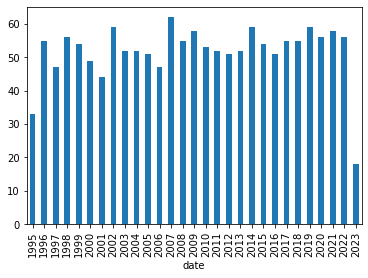

In [12]:
df.groupby(df['date'].dt.year)['session_id'].nunique().plot(kind='bar')
plt.show()

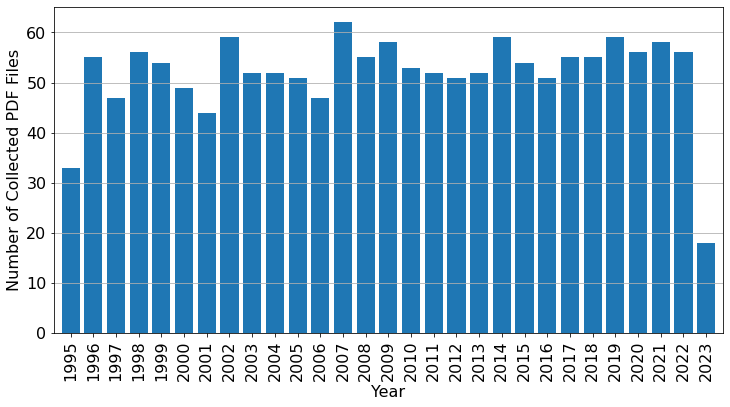

In [13]:
s = df.groupby(df['date'].dt.year)['session_id'].nunique()
years = s.index
counts = s.values

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(12,6))

plt.bar(years, counts)
plt.xticks(np.arange(min(years), max(years)+1, 1))
plt.xlim([min(years)-0.75, max(years)+0.75])
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Number of Collected PDF Files")
plt.grid(axis = 'y')
plt.show()

## Paragraphs / spoken statements

All data

<AxesSubplot: xlabel='date'>

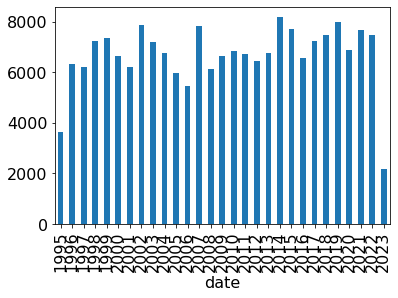

In [14]:
df.groupby(df['date'].dt.year)['paragraph_id'].count().plot(kind='bar')

All sessions of 2022

<AxesSubplot: xlabel='session_title'>

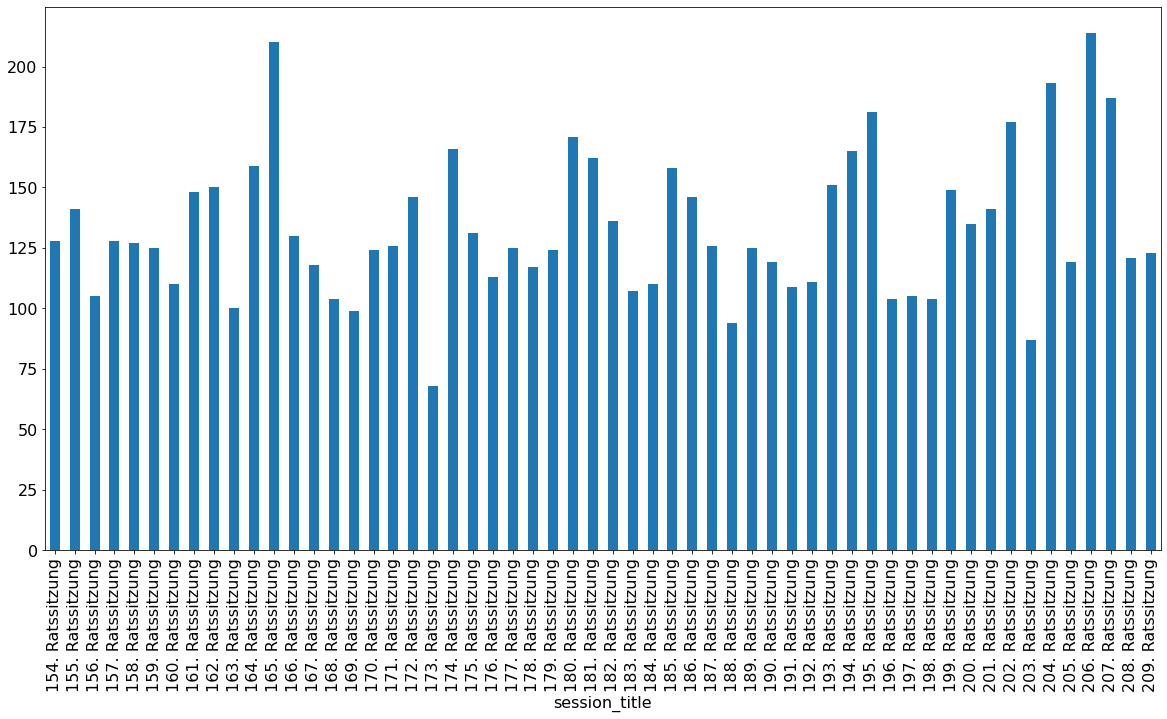

In [15]:
df[df['date'].dt.year == 2022].groupby('session_title')['paragraph_id'].count().plot(kind='bar', figsize=(20, 10))

2022's sessions: Statements per party

<AxesSubplot: xlabel='session_title'>

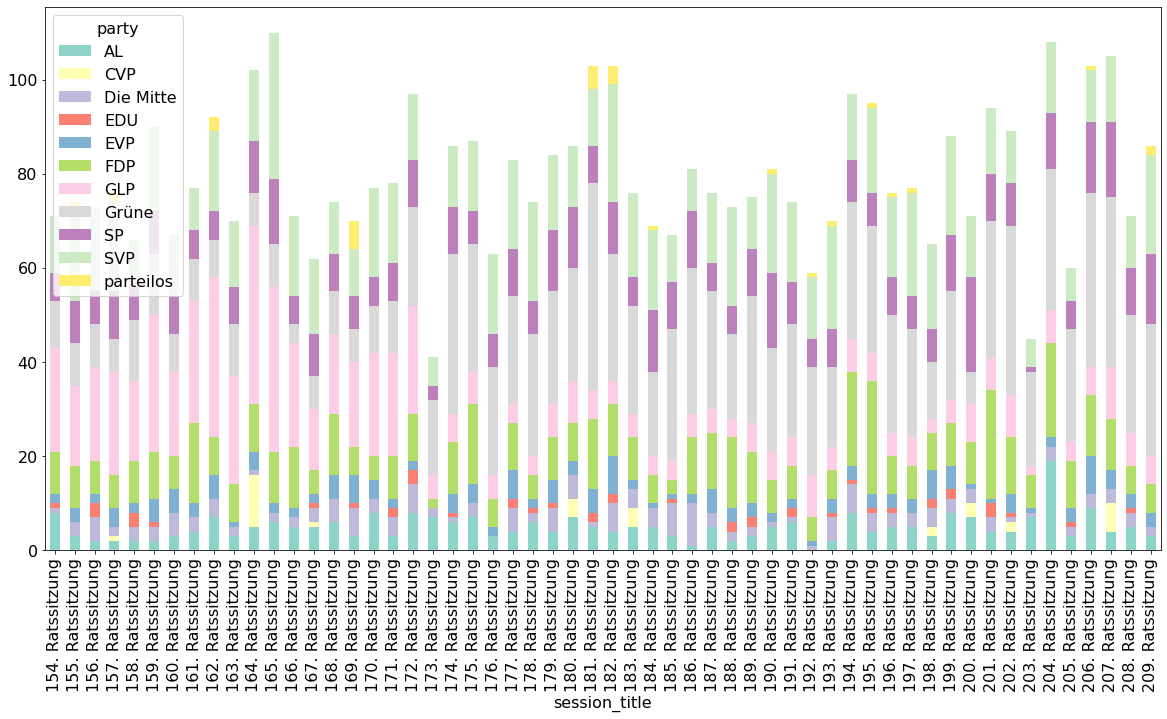

In [16]:
df[df['date'].dt.year == 2022].groupby(['session_title', 'party'])['paragraph_id'].size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), colormap='Set3')

Attention! After Session 172, there is a suspicious drop in the statements from GLP. This is because until then, the Ratspräsident was from GLP, afterwards it changed to a politician from "Grüne". 

Hence, it is important to exclude administrative statements from the "Ratspräsident".

<AxesSubplot: xlabel='session_title'>

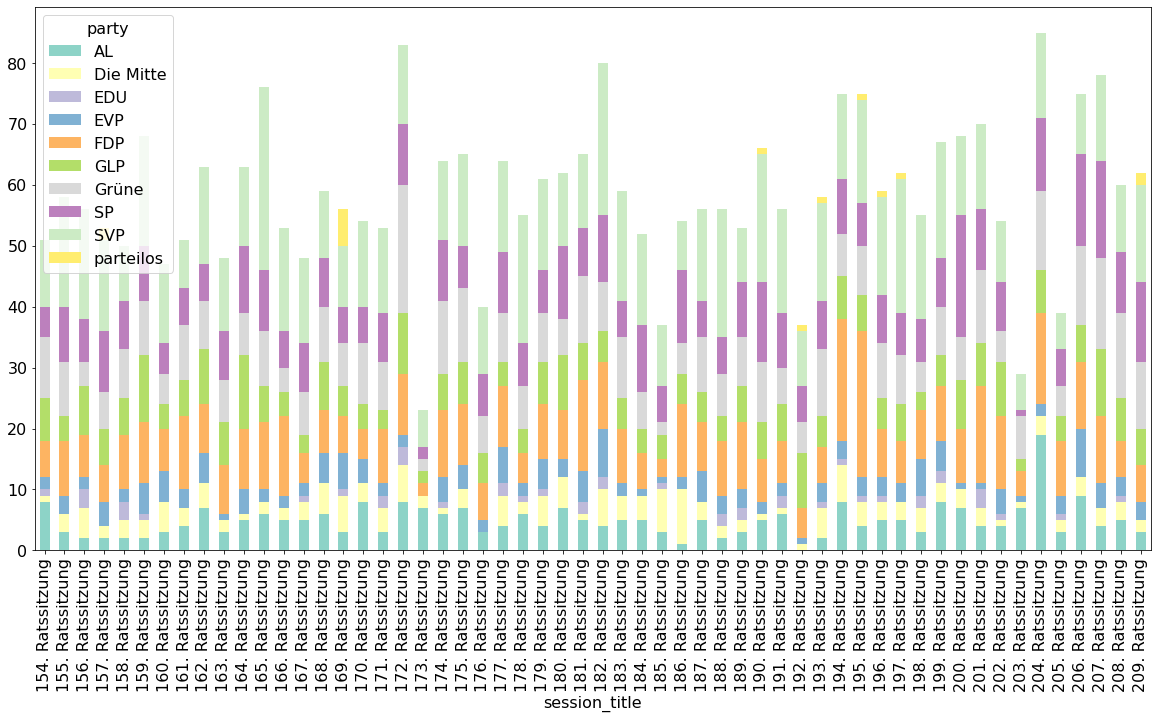

In [17]:
df[(df['date'].dt.year == 2022) & (df['in_admin_role'] == False) & (df["council"] == "Kantonsrat")].groupby(['session_title', 'party'])['paragraph_id'].size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), colormap='Set3')

In [18]:
df['session_no'] = df['session_title'].str.replace("( ).*","")
df

/tmp/ipykernel_25533/1463219622.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['session_no'] = df['session_title'].str.replace("( ).*","")


,paragraph_id,item_of_business,person_id,first_name,last_name,council,party,in_admin_role,text,date,session_title,session_id,session_no
0,203298,1. Mitteilungen,20281,Werner,Hegetschweiler,Kantonsrat,FDP,False,", Alterspräsident, eröffnet die erste Kantonsr...",1995-05-08,1. Ratssitzung,1595,1.
1,203324,1. Mitteilungen,None,None,None,None,None,False,Dank der modernen Datenspeicherungstechnik be...,1995-05-08,1. Ratssitzung,1595,1.
2,203326,1. Mitteilungen,None,None,None,None,None,False,• Das Ansehen der Politiker in der Bevölkerung...,1995-05-08,1. Ratssitzung,1595,1.
3,203346,1. Mitteilungen,None,None,None,None,None,False,Wir müssen unseren Haushalt wieder in Ordnung...,1995-05-08,1. Ratssitzung,1595,1.
4,203361,"2. Wahl des Büros des Kantonsrates (Präsidium,...",20281,Werner,Hegetschweiler,Kantonsrat,FDP,False,: Gemäss § 71 des Gesetzes über die Wahlen und...,1995-05-08,1. Ratssitzung,1595,1.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193496,349083,4. Verschiedenes,21998,Esther,Guyer,Kantonsrat,Grüne,True,Vielen herzlichen Dank. Und jetzt hören wir n...,2023-04-24,227. Ratssitzung,2739,227.
193497,349084,4. Verschiedenes,None,None,None,None,None,False,"(Es folgt eine Musikeinlage, Applaus.)",2023-04-24,227. Ratssitzung,2739,227.
193498,349085,4. Verschiedenes,None,None,None,None,None,False,12.50 Uhr,2023-04-24,227. Ratssitzung,2739,227.
193499,349086,4. Verschiedenes,None,None,None,None,None,False,"Zürich, den 24. April 2023 Die Protokollführer...",2023-04-24,227. Ratssitzung,2739,227.


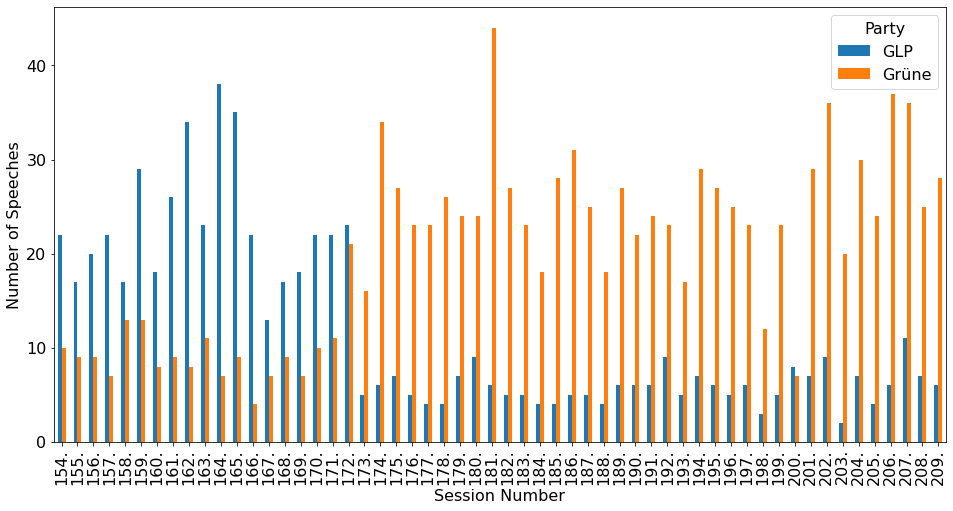

In [19]:

ax = df[(df['date'].dt.year == 2022) & (df['party'].isin(["GLP", "Grüne"]))].groupby(['session_no', 'party'])['paragraph_id'].size().unstack().plot(kind='bar', stacked=False, figsize=(16, 8))
ax.set_xlabel("Session Number")
ax.set_ylabel("Number of Speeches")
ax.legend(title='Party')

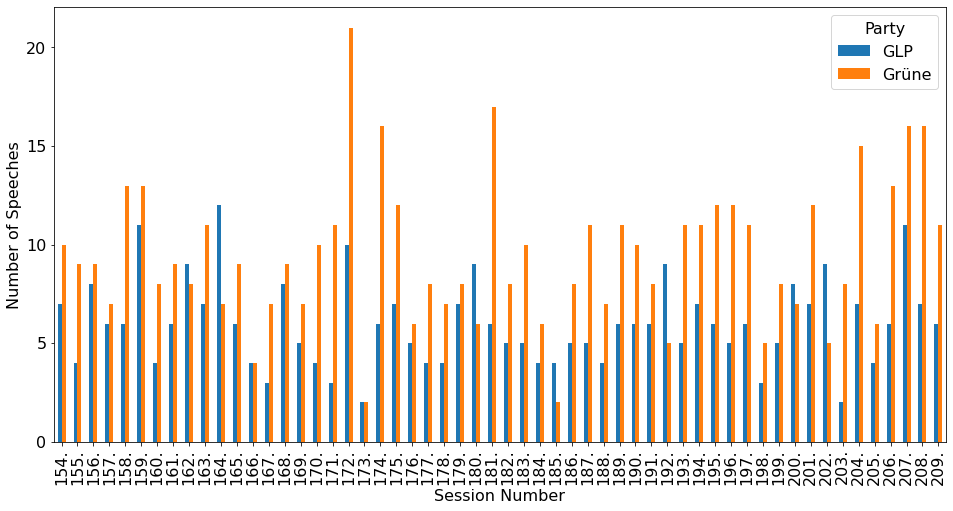

In [20]:

ax = df[(df['date'].dt.year == 2022) & (df['party'].isin(["GLP", "Grüne"])) & (df['in_admin_role'] == False)].groupby(['session_no', 'party'])['paragraph_id'].size().unstack().plot(kind='bar', stacked=False, figsize=(16, 8))
ax.set_xlabel("Session Number")
ax.set_ylabel("Number of Speeches")
ax.set_yticks(ax.get_yticks()[::2])
ax.legend(title='Party')

In [21]:
df[(df['date'].dt.year == 2022) & (df['in_admin_role'] == False) & (df["council"] == "Kantonsrat") & (df['party']=="parteilos")]

,paragraph_id,item_of_business,person_id,first_name,last_name,council,party,in_admin_role,text,date,session_title,session_id,session_no
184314,318658,5. Bewilligungsverfahren in Tierversuchen,22214,Urs,Hans,Kantonsrat,parteilos,False,"Ich spreche eigentlich nur, weil die Initiati...",2022-01-24,157. Ratssitzung,654,157.
184316,318660,5. Bewilligungsverfahren in Tierversuchen,22214,Urs,Hans,Kantonsrat,parteilos,False,Ich möchte meinem Bauernkollegen vehement wid...,2022-01-24,157. Ratssitzung,654,157.
185839,313658,8. Standesinitiative zur definitiven Aufhebung...,22214,Urs,Hans,Kantonsrat,parteilos,False,vom 28. Juni 2021 \nKR-Nr. 257/2021,2022-03-28,169. Ratssitzung,638,169.
185840,313736,8. Standesinitiative zur definitiven Aufhebung...,22214,Urs,Hans,Kantonsrat,parteilos,False,Ich lebte einmal einen Sommer lang in Kanada....,2022-03-28,169. Ratssitzung,638,169.
185862,314269,10. Einreichung einer Standesinitiative zu ein...,22214,Urs,Hans,Kantonsrat,parteilos,False,vom 12. Juli 2021 \nKR-Nr. 283/2021,2022-03-28,169. Ratssitzung,638,169.
185863,314276,10. Einreichung einer Standesinitiative zu ein...,22214,Urs,Hans,Kantonsrat,parteilos,False,Ich möchte noch (auf ein Votum bei der Behand...,2022-03-28,169. Ratssitzung,638,169.
185869,314356,11. Sofortiges Verbot der Anwendung von PCR-Te...,22214,Urs,Hans,Kantonsrat,parteilos,False,vom 23. August 2021 \nKR-Nr. 301/2021,2022-03-28,169. Ratssitzung,638,169.
185870,314360,11. Sofortiges Verbot der Anwendung von PCR-Te...,22214,Urs,Hans,Kantonsrat,parteilos,False,"In der Schweiz wird durch Bund, Kantone, viel...",2022-03-28,169. Ratssitzung,638,169.
188605,317855,6. Modellversuch «Bedingungsloses Grundeinkommen»,22214,Urs,Hans,Kantonsrat,parteilos,False,Ich habe ein paar Fragen zu Florian Heer und ...,2022-09-12,190. Ratssitzung,685,190.
188948,315528,4. Trinkwasserqualität und mögliche Gesundheit...,22214,Urs,Hans,Kantonsrat,parteilos,False,Ich möchte die Bauern hier im Saal doch etwas...,2022-09-26,193. Ratssitzung,689,193.


In [22]:
df_22_parties = df[(df['date'].dt.year == 2022) & (df['in_admin_role'] == False) & (df["council"] == "Kantonsrat")].groupby(['party'], as_index=False)['paragraph_id'].size().sort_values(by='size', ascending=False)
df_22_parties

,party,size
8,SVP,797
4,FDP,503
7,SP,476
6,Grüne,463
5,GLP,336
0,AL,273
1,Die Mitte,179
3,EVP,178
2,EDU,45
9,parteilos,16


In [23]:
df_22_parties['seats'] = [45, 29, 35, 21, 23, 6, 8, 8, 4, 1]
df_22_parties

,party,size,seats
8,SVP,797,45
4,FDP,503,29
7,SP,476,35
6,Grüne,463,21
5,GLP,336,23
0,AL,273,6
1,Die Mitte,179,8
3,EVP,178,8
2,EDU,45,4
9,parteilos,16,1


In [24]:
df_22_parties['prc_speak'] = df_22_parties['size'] / df_22_parties['size'].sum() * 100
df_22_parties['prc_seats'] = df_22_parties['seats'] / df_22_parties['seats'].sum() * 100

In [25]:
df_22_parties

,party,size,seats,prc_speak,prc_seats
8,SVP,797,45,24.402939,25.000000
4,FDP,503,29,15.401102,16.111111
7,SP,476,35,14.574403,19.444444
6,Grüne,463,21,14.176363,11.666667
5,GLP,336,23,10.287814,12.777778
0,AL,273,6,8.358849,3.333333
1,Die Mitte,179,8,5.480710,4.444444
3,EVP,178,8,5.450092,4.444444
2,EDU,45,4,1.377832,2.222222
9,parteilos,16,1,0.489896,0.555556


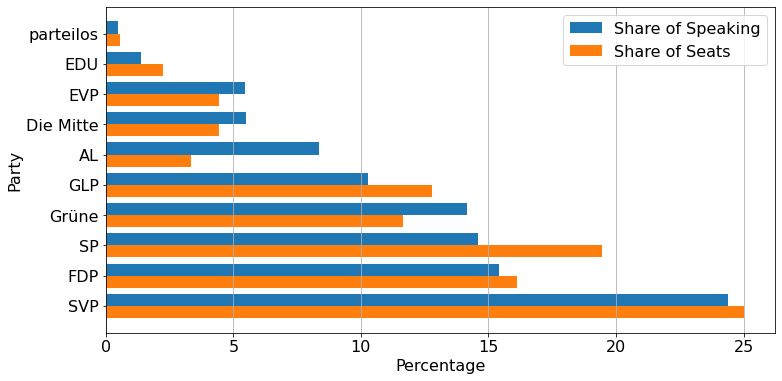

In [26]:
y_axis = np.arange(len(df_22_parties))
plt.figure(figsize=(12,6))
plt.barh(y_axis + 0.2, df_22_parties['prc_speak'], height=0.4, label="Share of Speaking")
plt.barh(y_axis - 0.2, df_22_parties['prc_seats'], height=0.4, label="Share of Seats")
plt.yticks(y_axis, df_22_parties['party'])
plt.legend()
plt.xlabel("Percentage")
plt.ylabel("Party")
plt.grid(axis = 'x')
plt.show()

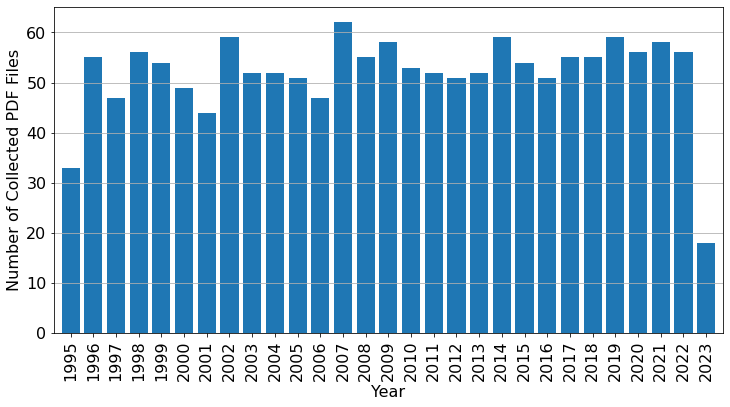

In [27]:
s = df.groupby(df['date'].dt.year)['session_id'].nunique()
years = s.index
counts = s.values

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(12,6))

plt.bar(years, counts)
plt.xticks(np.arange(min(years), max(years)+1, 1))
plt.xlim([min(years)-0.75, max(years)+0.75])
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Number of Collected PDF Files")
plt.grid(axis = 'y')
plt.show()

Parties over the years

In [28]:
party_map = {"AL":"AL", "BDP":"Die Mitte", "CVP":"Die Mitte", "Die Mitte":"Die Mitte", "EDU":"EDU", "EVP":"EVP", "FDP":"FDP", "GLP":"GLP", "Grüne":"Grüne", "GPS":"Grüne", "SP":"SP", "SVP":"SVP"}

In [29]:
df['party_man'] = df["party"].map(party_map)
df

,paragraph_id,item_of_business,person_id,first_name,last_name,council,party,in_admin_role,text,date,session_title,session_id,session_no,party_man
0,203298,1. Mitteilungen,20281,Werner,Hegetschweiler,Kantonsrat,FDP,False,", Alterspräsident, eröffnet die erste Kantonsr...",1995-05-08,1. Ratssitzung,1595,1.,FDP
1,203324,1. Mitteilungen,None,None,None,None,None,False,Dank der modernen Datenspeicherungstechnik be...,1995-05-08,1. Ratssitzung,1595,1.,NaN
2,203326,1. Mitteilungen,None,None,None,None,None,False,• Das Ansehen der Politiker in der Bevölkerung...,1995-05-08,1. Ratssitzung,1595,1.,NaN
3,203346,1. Mitteilungen,None,None,None,None,None,False,Wir müssen unseren Haushalt wieder in Ordnung...,1995-05-08,1. Ratssitzung,1595,1.,NaN
4,203361,"2. Wahl des Büros des Kantonsrates (Präsidium,...",20281,Werner,Hegetschweiler,Kantonsrat,FDP,False,: Gemäss § 71 des Gesetzes über die Wahlen und...,1995-05-08,1. Ratssitzung,1595,1.,FDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193496,349083,4. Verschiedenes,21998,Esther,Guyer,Kantonsrat,Grüne,True,Vielen herzlichen Dank. Und jetzt hören wir n...,2023-04-24,227. Ratssitzung,2739,227.,Grüne
193497,349084,4. Verschiedenes,None,None,None,None,None,False,"(Es folgt eine Musikeinlage, Applaus.)",2023-04-24,227. Ratssitzung,2739,227.,NaN
193498,349085,4. Verschiedenes,None,None,None,None,None,False,12.50 Uhr,2023-04-24,227. Ratssitzung,2739,227.,NaN
193499,349086,4. Verschiedenes,None,None,None,None,None,False,"Zürich, den 24. April 2023 Die Protokollführer...",2023-04-24,227. Ratssitzung,2739,227.,NaN


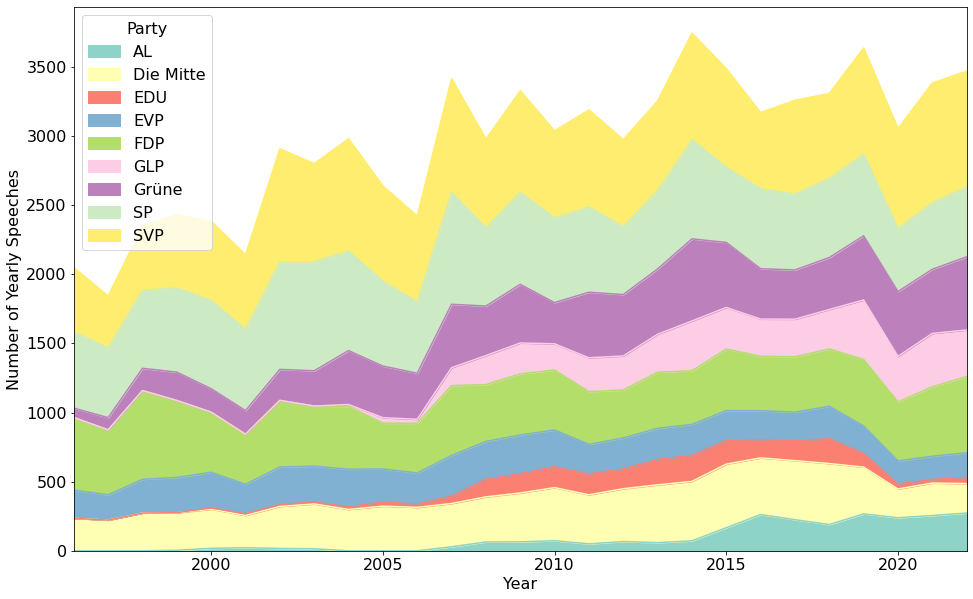

In [30]:
# tmp = df.groupby([df['date'].dt.year, 'party'])['paragraph_id'].size().unstack()
party_selection = ["AL", "BDP", "CVP", "Die Mitte", "EDU", "EVP", "FDP", "GLP", "Grüne", "SP", "SVP"]
ax = df[(df['party_man'].isin(party_selection)) & (df['date'].dt.year <= 2022) & (df['date'].dt.year >= 1996) & (df['in_admin_role'] == False)].groupby([df['date'].dt.year, 'party_man'])['paragraph_id'].size().unstack().plot(kind='area', figsize=(16, 10), colormap='Set3', xlim=(1996,2022))
ax.set_xlabel("Year")
ax.set_ylabel("Number of Yearly Speeches")
ax.legend(title='Party')

<AxesSubplot: xlabel='date'>

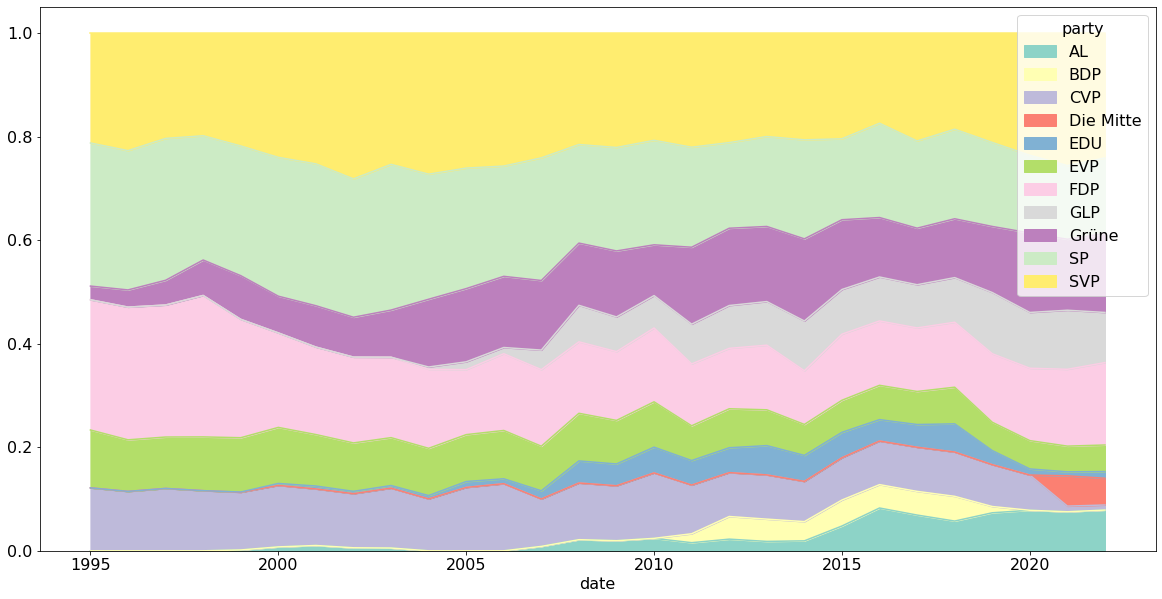

In [31]:
plot_df = df[(df['party'].isin(party_selection)) & (df['date'].dt.year <= 2022) & (df['in_admin_role'] == False)].groupby([df['date'].dt.year, 'party'])['paragraph_id'].size().unstack()
plot_df['sum'] = plot_df[party_selection].sum(axis=1)
plot_df[party_selection].div(plot_df['sum'], axis=0).plot(kind='area', figsize=(20, 10), colormap='Set3')


In [32]:
df[(df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")].groupby(['person_id', 'first_name', 'last_name', 'party'])['paragraph_id'].count().nlargest(20)

person_id  first_name  last_name   party
22063      Hans-Peter  Amrein      SVP      1098
22059      Willy       Haderer     SVP      1050
21998      Esther      Guyer       Grüne    1015
8720       Peter       Reinhard    EVP       900
22242      Markus      Bischoff    AL        851
21616      Robert      Brunner     Grüne     789
22103      Matthias    Hauser      SVP       764
22234      Lorenz      Habicher    SVP       758
21920      Willy       Germann     CVP       689
8382       Ralf        Margreiter  Grüne     686
18781      Lucius      Dürr        CVP       672
21359      Ruedi       Lais        SP        660
8872       Daniel      Vischer     GP        587
21503      Lorenz      Schmid      CVP       565
18099      Markus      Schaaf      EVP       563
22180      Hans        Egli        EDU       533
22238      Kaspar      Bütikofer   AL        528
8100       Susanne     Rihs-Lanz   Grüne     511
21635      Kurt        Schreiber   EVP       488
20710      Gerhard     Fisch

In [44]:
df[(df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")].groupby(['person_id', 'first_name', 'last_name', 'party'])['paragraph_id'].count().nsmallest(20)

person_id  first_name   last_name     party    
17619      Beatrice     La Roche      SP           1
18077      Rolando      Keller        SVP          1
18660      Fredy        Ganz          parteilos    1
20103      Nathalie     Rickli        SVP          1
20299      Hans         Wickli        SVP          1
21142      Werner       Furrer        SVP          1
21259      Fritz        Ott           FPS          1
21410      Marco V.     Camin         FDP          1
21459      Walter       Bosshard      FDP          1
22112      Rolf         Jenny         SVP          1
22134      Hans-Ulrich  Brechbühl     SVP          1
22159      Andreas      Juchli        FDP          1
8012       Patricia     Ljuboje       Grüne        1
8015       Peter        Meier         EDU          1
8061       Beatrice     Krebs         FDP          1
8429       Thomas       Meier         SVP          1
8480       Erhard       Bernet        parteilos    1
8629       Irene        Minder-Roost  SVP          

In [38]:
df[(df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")].groupby(['person_id', 'first_name', 'last_name', 'party'])['paragraph_id'].count().mean()

109.67213114754098

In [33]:
df[(df['date'].dt.year == 2022) & (df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")].groupby(['person_id', 'first_name', 'last_name', 'party'])['paragraph_id'].count().nlargest(20)

person_id  first_name   last_name      party    
22063      Hans-Peter   Amrein         SVP          127
22242      Markus       Bischoff       AL           100
22068      Alex         Gantner        FDP           92
9060       Manuel       Sahli          AL            65
22188      Ann Barbara  Franzen        FDP           59
22198      Martin       Hübscher       SVP           51
22106      Christian    Lucek          SVP           49
22187      Thomas       Forrer         Grüne         49
22196      Felix        Hoesch         SP            48
21534      Stefan       Schmid         SVP           45
17370      Daniel       Sommer         EVP           44
22234      Lorenz       Habicher       SVP           44
21984      Sonja        Rueff-Frenkel  FDP           40
22145      Ruth         Ackermann      Die Mitte     40
22185      Karin        Fehr Thoma     Grüne         39
8057       Thomas       Wirth          GLP           38
22006      Valentin     Landmann       SVP           37

In [43]:
df[(df['date'].dt.year == 2022) & (df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")].groupby(['person_id', 'first_name', 'last_name', 'party'])['paragraph_id'].count().nsmallest(20)

person_id  first_name  last_name         party
19022      Gabriel     Mäder             GLP      1
21482      Thomas      Vogel             FDP      1
21489      Beat        Huber             SVP      1
21704      Roland      Kappeler          SP       1
21706      Esther      Meier             SP       1
21708      Susanne     Trost Vetter      SP       1
21864      Mario       Senn              FDP      1
22155      Susanna     Lisibach          SVP      1
22159      Andreas     Juchli            FDP      1
22163      Angie       Romero            FDP      1
21492      Sandra      Bienek            GLP      2
21668      Nora        Bussmann Bulaños  Grüne    2
21710      Marc        Bochsler          SVP      2
22025      Peter       Schick            SVP      2
22076      Urs         Glättli           GLP      2
22233      Roland      Scheck            SVP      2
8286       Erich       Vontobel          EDU      2
22046      Daniela     Rinderknecht      SVP      3
22158      Patric

In [41]:
df[(df['date'].dt.year == 2022) & (df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")].groupby(['person_id', 'first_name', 'last_name', 'party'])['paragraph_id'].count().mean()

17.372340425531913

In [34]:
df['word_count'] = df['text'].str.strip().str.split(" ").apply(len)

In [35]:
df.head(10)

,paragraph_id,item_of_business,person_id,first_name,last_name,council,party,in_admin_role,text,date,session_title,session_id,session_no,party_man,word_count
0,203298,1. Mitteilungen,20281,Werner,Hegetschweiler,Kantonsrat,FDP,False,", Alterspräsident, eröffnet die erste Kantonsr...",1995-05-08,1. Ratssitzung,1595,1.,FDP,312
1,203324,1. Mitteilungen,None,None,None,None,None,False,Dank der modernen Datenspeicherungstechnik be...,1995-05-08,1. Ratssitzung,1595,1.,NaN,79
2,203326,1. Mitteilungen,None,None,None,None,None,False,• Das Ansehen der Politiker in der Bevölkerung...,1995-05-08,1. Ratssitzung,1595,1.,NaN,219
3,203346,1. Mitteilungen,None,None,None,None,None,False,Wir müssen unseren Haushalt wieder in Ordnung...,1995-05-08,1. Ratssitzung,1595,1.,NaN,481
4,203361,"2. Wahl des Büros des Kantonsrates (Präsidium,...",20281,Werner,Hegetschweiler,Kantonsrat,FDP,False,: Gemäss § 71 des Gesetzes über die Wahlen und...,1995-05-08,1. Ratssitzung,1595,1.,FDP,85
5,203384,"2. Wahl des Büros des Kantonsrates (Präsidium,...",8720,Peter,Reinhard,Kantonsrat,EVP,False,Im Namen der einstimmigen Interfraktionellen ...,1995-05-08,1. Ratssitzung,1595,1.,EVP,17
6,203386,"2. Wahl des Büros des Kantonsrates (Präsidium,...",None,None,None,None,None,False,Weitere Vorschläge werden nicht gemacht.,1995-05-08,1. Ratssitzung,1595,1.,NaN,5
7,203406,"2. Wahl des Büros des Kantonsrates (Präsidium,...",None,None,None,None,None,False,\nAnwesende Ratsmitglieder 172 \nEingegangene...,1995-05-08,1. Ratssitzung,1595,1.,NaN,82
8,203456,"2. Wahl des Büros des Kantonsrates (Präsidium,...",20046,Markus,Kägi,Kantonsrat,SVP,False,"\nSoeben haben Sie mich, geschätzte Kolleginn...",1995-05-08,1. Ratssitzung,1595,1.,SVP,474
9,203544,"2. Wahl des Büros des Kantonsrates (Präsidium,...",None,None,None,None,None,False,«Lass unser Vaterland niemals im Streit um da...,1995-05-08,1. Ratssitzung,1595,1.,NaN,584


In [18]:
df[(df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")].groupby(['person_id', 'first_name', 'last_name', 'party'])['word_count'].sum().nlargest(20)

person_id  first_name  last_name     party
22059      Willy       Haderer       SVP      278134
22063      Hans-Peter  Amrein        SVP      255107
8382       Ralf        Margreiter    Grüne    254892
21920      Willy       Germann       CVP      249954
22242      Markus      Bischoff      AL       244253
21998      Esther      Guyer         Grüne    233543
22103      Matthias    Hauser        SVP      229789
21359      Ruedi       Lais          SP       228964
21616      Robert      Brunner       Grüne    209609
22234      Lorenz      Habicher      SVP      203264
8720       Peter       Reinhard      EVP      194857
22238      Kaspar      Bütikofer     AL       182754
18099      Markus      Schaaf        EVP      172075
18781      Lucius      Dürr          CVP      167719
21503      Lorenz      Schmid        CVP      167433
8872       Daniel      Vischer       GP       165404
8100       Susanne     Rihs-Lanz     Grüne    157073
21942      Sabine      Ziegler       SP       150330
805

In [37]:
df[(df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")].groupby(['person_id', 'first_name', 'last_name', 'party'])['word_count'].sum().mean()

30400.311475409835

In [19]:
df[(df['date'].dt.year == 2022) & (df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")].groupby(['person_id', 'first_name', 'last_name', 'party'])['word_count'].sum().nlargest(20)

person_id  first_name     last_name       party    
22063      Hans-Peter     Amrein          SVP          32901
22068      Alex           Gantner         FDP          31968
22188      Ann Barbara    Franzen         FDP          22296
9060       Manuel         Sahli           AL           18593
22242      Markus         Bischoff        AL           16530
22187      Thomas         Forrer          Grüne        16452
17370      Daniel         Sommer          EVP          14616
21534      Stefan         Schmid          SVP          14586
22198      Martin         Hübscher        SVP          14342
8057       Thomas         Wirth           GLP          13984
22185      Karin          Fehr Thoma      Grüne        13567
22106      Christian      Lucek           SVP          13405
21986      Andrew         Katumba         SP           13269
22248      Marc           Bourgeois       FDP          12330
22234      Lorenz         Habicher        SVP          12175
21438      Jean-Philippe  Pinto  

In [40]:
df[(df['date'].dt.year == 2022) & (df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")].groupby(['person_id', 'first_name', 'last_name', 'party'])['word_count'].sum().mean()

5151.468085106383

In [20]:
df[(df['date'].dt.year == 2022) & (df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")].groupby(['person_id', 'first_name', 'last_name', 'party'])['word_count'].mean().nlargest(20)

person_id  first_name          last_name      party    
21710      Marc                Bochsler       SVP          704.500000
22232      Ueli                Bamert         SVP          620.222222
22171      André               Bender         SVP          616.000000
22186      Christoph           Fischbach      SP           555.333333
21443      Farid               Zeroual        Die Mitte    546.400000
20463      André               Müller         FDP          542.750000
22239      Tobias              Langenegger    SP           534.000000
21986      Andrew              Katumba        SP           530.760000
22071      Orlando             Wyss           SVP          518.000000
19022      Gabriel             Mäder          GLP          507.000000
22074      Claudia             Wyssen         GLP          501.875000
22062      Arianne             Moser-Schäfer  FDP          501.600000
22149      Nathalie            Aeschbacher    GLP          501.533333
22100      Isabel              Gar

In [54]:
df[(df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")].groupby(['person_id', 'first_name', 'last_name', 'party'])['word_count'].mean().nlargest(20)

person_id  first_name  last_name      party
21710      Marc        Bochsler       SVP      704.500000
21019      Markus      Notter         SP       619.333333
4703       Thomas      Huonker        SP       614.500000
21704      Roland      Kappeler       SP       610.500000
22171      André       Bender         SVP      578.794872
21194      Martin      Zollinger      FDP      569.500000
22239      Tobias      Langenegger    SP       527.795082
21974      Margrit     Haller-Traber  SVP      520.500000
8698       Hermann     Weigold        SVP      516.888889
4962       Josef       Vogel          SP       508.148148
8012       Patricia    Ljuboje        Grüne    501.000000
4968       Susanne     Frutig         SP       498.923077
22132      Guido       Bergmaier      SVP      494.000000
21613      Peter A.    Schmid         SP       493.517241
22232      Ueli        Bamert         SVP      486.265306
22062      Arianne     Moser-Schäfer  FDP      473.269231
20374      Hans        Rutsc

In [21]:
df[(df['date'].dt.year == 2022) & (df['in_admin_role'] == False) & (df['council'] == "Kantonsrat") & (df['word_count']> 3)].groupby(['person_id', 'first_name', 'last_name', 'party'])['word_count'].mean().nsmallest(20)

person_id  first_name  last_name        party    
21542      Sylvie      Matter           SP            72.833333
21489      Beat        Huber            SVP           82.000000
21998      Esther      Guyer            Grüne         85.047619
21706      Esther      Meier            SP            98.000000
21708      Susanne     Trost Vetter     SP           114.000000
22172      Michael     Biber            FDP          119.750000
21996      Kathrin     Stutz            Grüne        121.250000
22145      Ruth        Ackermann        Die Mitte    121.875000
22016      Martin      Huber            FDP          127.888889
22023      Beat        Monhart          EVP          135.357143
21712      Michael     Bänninger        EVP          147.750000
21707      Hans        Finsler          SVP          149.615385
22051      Beatrix     Stüssi           SP           152.200000
21705      Barbara     Günthard Fitze   EVP          152.928571
21470      Benjamin    Walder           Grüne        1

In [55]:
df[(df['in_admin_role'] == False) & (df['council'] == "Kantonsrat") & (df['word_count']> 3)].groupby(['person_id', 'first_name', 'last_name', 'party'])['word_count'].mean().nsmallest(20)

person_id  first_name     last_name   party    
8689       Emil           De-Boni     FDP            9.000000
17956      Roland         Brändli     SVP           24.000000
18660      Fredy          Ganz        parteilos     25.000000
21142      Werner         Furrer      SVP           33.000000
17619      Beatrice       La Roche    SP            52.000000
21459      Walter         Bosshard    FDP           66.000000
4531       Kurt           Krebs       SVP           78.565217
8196       Christopher    Vohdin      SVP           80.000000
20046      Markus         Kägi        SVP           85.945946
17551      Markus         Hess        FDP           93.500000
20341      Martin         Zuber       SVP          112.250000
21595      Isidor Markus  Stirnimann  FDP          112.333333
8476       Hans Peter     Häring      EDU          113.339564
18887      Hans Jörg      Fischer     SD           113.469388
17764      Peter          Preisig     SVP          114.312500
21526      Hans-Ueli  

In [22]:
df[df['paragraph_id'] == 100362]['text'].str.strip().str.split(" ")

Series([], Name: text, dtype: object)

In [23]:
df[df['person_id'].notnull()]['word_count'].describe()

count    104712.000000
mean        238.983001
std         233.708948
min           1.000000
25%          61.000000
50%         180.000000
75%         342.000000
max        3650.000000
Name: word_count, dtype: float64

Text(0.5, 0, 'Number of Words per Speech')

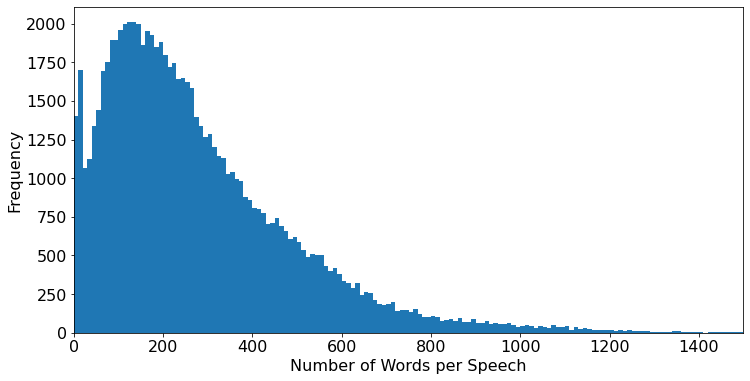

In [66]:
ax = df[(df['person_id'].notnull()) & (df['in_admin_role'] == False) & (df['council'] == "Kantonsrat") & (df['word_count']> 3)]['word_count'].plot(kind='hist', range=(0, 1500), figsize=(12, 6), bins=150, xlim=[0, 1500])
ax.set_xlabel("Number of Words per Speech")
#ax.set_ylabel("Number of Yearly Speeches")

In [70]:
df[(df['person_id'].notnull()) & (df['in_admin_role'] == False) & (df['council'] == "Kantonsrat")]['word_count'].median()

225.0

In [25]:
df[(df['word_count'] < 15) & (df['person_id'].notnull())]

,paragraph_id,item_of_business,person_id,first_name,last_name,council,party,in_admin_role,text,date,session_title,session_id,word_count
16,203639,"2. Wahl des Büros des Kantonsrates (Präsidium,...",8720,Peter,Reinhard,Kantonsrat,EVP,False,Namens der einstimmigen Interfraktionellen Ko...,1995-05-08,1. Ratssitzung,1595,12
17,203662,"2. Wahl des Büros des Kantonsrates (Präsidium,...",5405,Roland,Brunner,Kantonsrat,SP,False,,1995-05-08,1. Ratssitzung,1595,1
23,203670,"2. Wahl des Büros des Kantonsrates (Präsidium,...",8720,Peter,Reinhard,Kantonsrat,EVP,False,Namens der einstimmigen Interfraktionellen Ko...,1995-05-08,1. Ratssitzung,1595,9
258,152247,"2. Wahl des Büros des Kantonsrates (Präsidium,...",8720,Peter,Reinhard,Kantonsrat,EVP,False,Namens der einstimmigen Interfraktionellen Ko...,1995-05-22,3. Ratssitzung,694,12
259,152249,"2. Wahl des Büros des Kantonsrates (Präsidium,...",5405,Roland,Brunner,Kantonsrat,SP,False,,1995-05-22,3. Ratssitzung,694,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192390,321927,3. Wahl Ersatzmitglied Verwaltungsgericht,22242,Markus,Bischoff,Kantonsrat,AL,False,Die Interfraktionelle Konferenz schlägt Ihnen...,2023-03-06,219. Ratssitzung,713,8
192395,321932,4. Wahl Mitglied Finanzkommission,22242,Markus,Bischoff,Kantonsrat,AL,False,Die Interfraktionelle Konferenz schlägt Ihnen...,2023-03-06,219. Ratssitzung,713,8
192402,321939,2. Gesetz über das Universitätsspital Zürich (...,21998,Esther,Guyer,Kantonsrat,Grüne,True,Wir kommen nun zu den Fraktionssprechenden.,2023-03-06,219. Ratssitzung,713,6
192411,321948,2. Gesetz über das Universitätsspital Zürich (...,21998,Esther,Guyer,Kantonsrat,Grüne,True,Die Fraktionen haben ihre Erklärungen abgegeb...,2023-03-06,219. Ratssitzung,713,13


<AxesSubplot: >

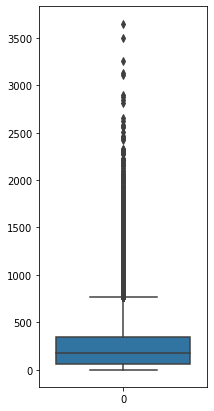

In [26]:
#df[df['person_id'].notnull()].boxplot(column='word_count', figsize=(10, 10))
plt.figure(figsize=(3,7))
sns.boxplot(df[df['person_id'].notnull()]['word_count'].values)

<AxesSubplot: >

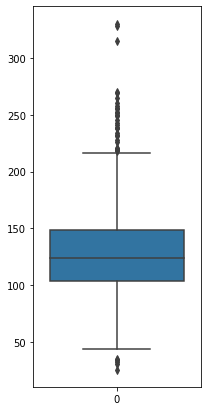

In [27]:
plt.figure(figsize=(3,7))
sns.boxplot(df.groupby('session_id')['paragraph_id'].count().values)